# Week 3: Grouping, filtering, and aggregating data

## Overview

In this exercise, we'll see the following:

* How to extract given rows or columns from a dataset to focus on data of interest.
* Operations that aggregate data, and those that transform data.
* Working with data in groups.
* Visualisation with a barplot, and basic customisations of `seaborn` plots.


## All aboard!

<div>
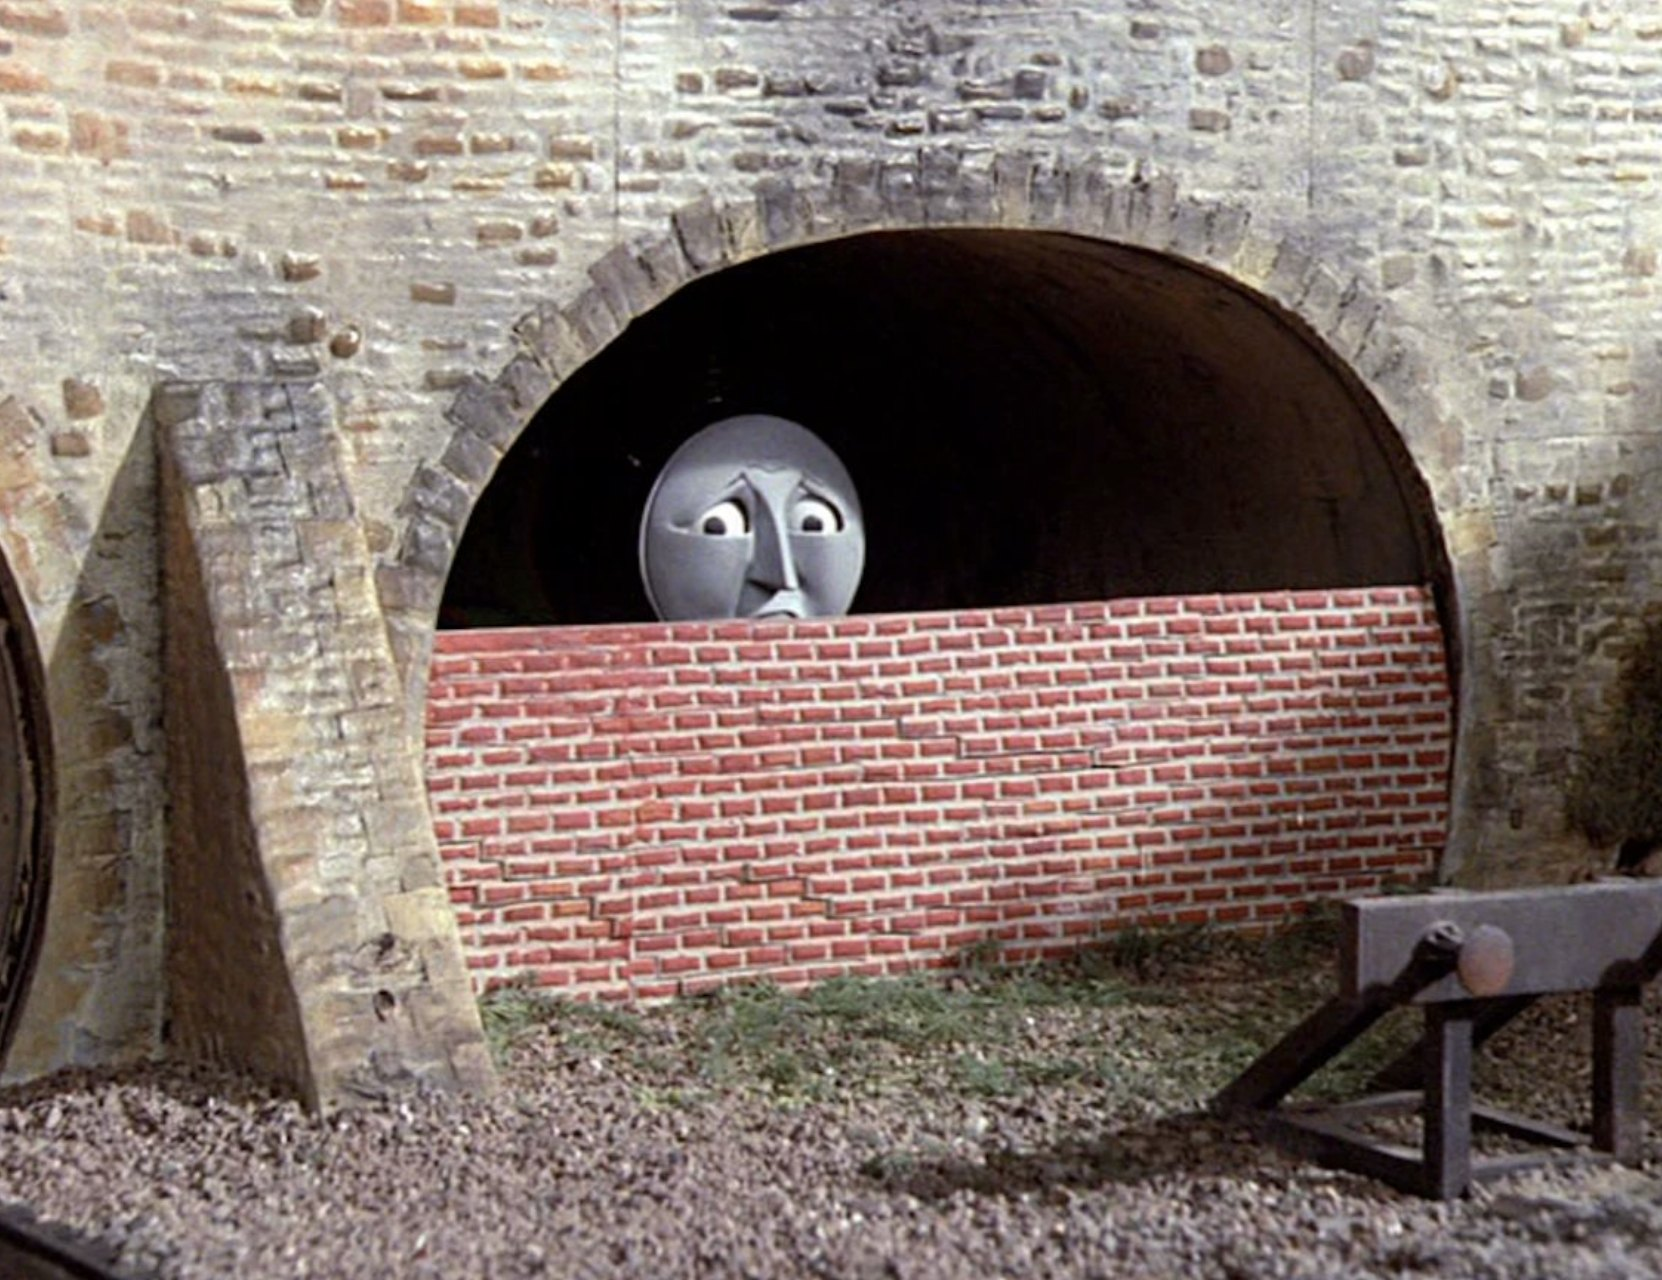
</div>

We all love trains.  (Don't we?)  Passenger trains are certainly an important part of transport policy in many countries, including the UK.  We also know that train ridership was enforced to be low during the pandemic - and that since then people have been commuting less to offices.  How do recent train ridership numbers compare to pre-pandemic levels?

The data for this exercise come from https://www.gov.uk/government/statistical-data-sets/rai02-capacity-and-overcrowding.  These provide passenger counts and capacity (seats) for trains into and out of city-centre stations for various cities, on a "typical autumn weekday".

I have done some organisation of the data to make it a bit easier to work with for our purposes.  The type of data cleaning I've done is what we will learn more about later in the module - but I did not want to let it get in our way when we are just starting out!
The data come as an Excel workbook, and I've kept it in that format.  I've posted it to https://github.com/tturocy/eco7026a/raw/main/2022-23/choochoo.xls.

In [218]:
import pandas as pd
from rich.progress import track as tr
import tqdm as tq

In [219]:
trains = pd.read_excel("https://github.com/tturocy/eco7026a/raw/main/2022-23/choochoo.xls")
trains

,Year,Direction,City,Metric,start-06:59,07:00-07:59,08:00-08:59,09:00-09:59,10:00-10:59,11:00-11:59,...,15:00-15:59,16:00-16:59,17:00-17:59,18:00-18:59,19:00-19:59,20:00-20:59,21:00-21:59,22:00-22:59,23:00-end,Total
0,2011,Arrivals,Birmingham,Passengers,1921.622008,8891.293852,17954.405926,8927.662625,8291.055385,6921.543045,...,5698.319471,7269.043282,7756.831465,6777.523570,4601.058504,2775.650277,1833.665166,1088.566417,801.283183,108545.829145
1,2011,Arrivals,Birmingham,Total seats,8207.000000,12308.000000,19013.000000,15671.000000,15938.000000,14765.000000,...,15396.000000,15629.000000,16039.000000,14159.000000,14642.000000,11934.000000,11223.000000,10307.000000,9116.000000,249138.000000
2,2011,Arrivals,Bristol,Passengers,368.473600,2164.754697,3574.623163,2183.507768,1330.965316,1648.521212,...,1319.951109,1586.607517,2669.386433,2005.635842,1208.412911,946.922487,836.926646,465.619608,417.293044,26169.159375
3,2011,Arrivals,Bristol,Total seats,1338.600000,3610.000000,4688.000000,4779.000000,3410.000000,3999.000000,...,3994.000000,3127.000000,4809.000000,3752.000000,4068.000000,3246.000000,3136.000000,3460.800000,2967.600000,65242.000000
4,2011,Arrivals,Cardiff,Passengers,671.618881,2728.215000,5573.884470,2678.933333,2423.416667,1848.300000,...,1683.238095,2373.673737,2802.380830,2329.546320,1156.415873,724.191667,613.506731,488.250000,573.104545,33119.268632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,2022,Departures,Nottingham,Total seats,1387.000000,2040.000000,2372.000000,1603.000000,2158.000000,1903.000000,...,1611.000000,2232.000000,1688.000000,1869.000000,2298.000000,2251.000000,1830.000000,976.000000,1569.000000,33843.000000
592,2022,Departures,Reading,Passengers,2952.971442,6663.016499,6781.035115,5303.355409,5207.456781,5768.243220,...,5668.995285,6759.887468,7037.831253,6439.224184,6113.974288,3381.560915,2779.678519,1918.062755,1419.037647,87290.266492
593,2022,Departures,Reading,Total seats,19724.000000,18114.000000,17949.000000,15954.000000,15709.000000,16491.000000,...,16201.000000,16553.000000,16614.000000,15223.000000,15696.000000,11242.000000,11424.000000,9106.000000,9470.000000,271429.000000
594,2022,Departures,Sheffield,Passengers,939.827792,1667.881418,1391.140728,1548.141458,1687.115113,1258.604262,...,2011.144113,2105.158669,2217.020974,1845.165088,1559.095430,1195.971196,741.140910,625.836681,258.248223,25629.646249


What's in the dataset?  One useful attribute of a DataFrame is `.dtypes`.  This gives us a list (actually a Series!) of all of the columns and the type of data in the column.

In [220]:
trains.dtypes

Year             int64
Direction       object
City            object
Metric          object
start-06:59    float64
07:00-07:59    float64
08:00-08:59    float64
09:00-09:59    float64
10:00-10:59    float64
11:00-11:59    float64
12:00-12:59    float64
13:00-13:59    float64
14:00-14:59    float64
15:00-15:59    float64
16:00-16:59    float64
17:00-17:59    float64
18:00-18:59    float64
19:00-19:59    float64
20:00-20:59    float64
21:00-21:59    float64
22:00-22:59    float64
23:00-end      float64
Total          float64
dtype: object

We see we have `Year` which is an integer, and various time intervals with floating-point numbers - these will be the passenger and capacity counts.  (Because they are averages, it makes sense for them to be floating-point numbers rather than integers.)  Three columns are type `object` - this means they are of some other data type.  Usually these are strings, as we will see is the case here.

Let's start by establishing the time covered by the dataset.  To do this, we can use **column operations** that work on column series.  To find the earliest year in the dataset, we can use `.min()`:

In [221]:
trains['Year'].min()

2011

And the latest year in the dataset is given by `.max()`.

In [222]:
trains['Year'].max()

2022

`.min()` and `.max()` are examples of **aggregation** operations.  An aggregation function takes a series (usually column) of data, and reduce it to (usually) a single number.  Other examples of commonly-used aggregation functions are `.count()`, `.sum()`, `.mean()`, `.std()`.

It is also possible to do more than one aggregation in the same operation.  You use the `.agg()` function, and you can pass it a list of aggregation functions to run.  When you do this, the easiest way to specify which functions is by passing their names as **text strings**.  (There are a few other ways as well which we will cover in due course.)


In [223]:
trains['Year'].agg(['min', 'max'])

min    2011
max    2022
Name: Year, dtype: int64

Now let's turn our attention to "Metric".  What kind of information does this contain?  It's a field containing text strings.  With this kind of data, a quite useful method for describing the contents of a column is `.value_counts()`, which gives us a Series showing the number of times each value appears in the column:

In [224]:
trains['Metric'].value_counts()

Metric
Passengers     298
Total seats    298
Name: count, dtype: int64

The dataset has two kinds of information: about passenger counts and the total number of seats (capacity).  For this exercise, we will focus just on passenger counts.  So we'd like to **filter** our DataFrame to contain only rows which contain information about passengers.

Which rows are these?  We have seen before that you can do arithmetic operations on Series using operations like `+`, `-` and so on.  You can also do logical operations on them as well!  So we can write

In [225]:
trains['Metric'] == "Passengers"

0       True
1      False
2       True
3      False
4       True
       ...  
591    False
592     True
593    False
594     True
595    False
Name: Metric, Length: 596, dtype: bool

The above gives us a series of type `bool`, which is `True` for any row where the metric is "Passengers" and `False` for any row where the metric is not "Passengers".

We can then filter a DataFrame's rows using the `[]` operator applying this Series:

In [226]:
trains[trains['Metric'] == "Passengers"]

,Year,Direction,City,Metric,start-06:59,07:00-07:59,08:00-08:59,09:00-09:59,10:00-10:59,11:00-11:59,...,15:00-15:59,16:00-16:59,17:00-17:59,18:00-18:59,19:00-19:59,20:00-20:59,21:00-21:59,22:00-22:59,23:00-end,Total
0,2011,Arrivals,Birmingham,Passengers,1921.622008,8891.293852,17954.405926,8927.662625,8291.055385,6921.543045,...,5698.319471,7269.043282,7756.831465,6777.523570,4601.058504,2775.650277,1833.665166,1088.566417,801.283183,108545.829145
2,2011,Arrivals,Bristol,Passengers,368.473600,2164.754697,3574.623163,2183.507768,1330.965316,1648.521212,...,1319.951109,1586.607517,2669.386433,2005.635842,1208.412911,946.922487,836.926646,465.619608,417.293044,26169.159375
4,2011,Arrivals,Cardiff,Passengers,671.618881,2728.215000,5573.884470,2678.933333,2423.416667,1848.300000,...,1683.238095,2373.673737,2802.380830,2329.546320,1156.415873,724.191667,613.506731,488.250000,573.104545,33119.268632
6,2011,Arrivals,Leeds,Passengers,1492.095019,6086.187497,11842.008582,5334.143799,4232.089580,3660.420400,...,2976.742273,3944.464249,4971.063120,3978.904117,2624.336320,1747.783479,1202.548077,881.850000,1017.948445,64840.826619
8,2011,Arrivals,Leicester,Passengers,373.042184,1364.720031,2323.742568,1664.538731,1619.239226,1417.244186,...,1625.394343,1881.706432,2132.463886,1913.625617,1718.945245,1005.368095,1083.352668,357.811370,602.183592,24968.495970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,2022,Departures,Manchester,Passengers,2818.596458,3415.995459,4307.159861,3985.906649,3988.634994,4898.450306,...,6182.247620,7940.410367,9517.722503,5811.035404,4120.348029,3220.379191,2503.297530,2117.086893,1786.903676,80422.165133
588,2022,Departures,Newcastle,Passengers,622.599899,1254.462842,1300.027333,1646.712638,1675.101378,1846.830028,...,1754.431277,2280.449085,1903.753695,1382.021738,1032.072181,1000.654942,716.470806,290.750194,0.000000,24426.166959
590,2022,Departures,Nottingham,Passengers,116.750000,318.800000,692.166667,336.533333,980.385714,709.416667,...,592.554131,1244.041667,1183.944444,1816.658333,1435.923810,965.142857,442.200000,252.366667,325.333333,13445.682306
592,2022,Departures,Reading,Passengers,2952.971442,6663.016499,6781.035115,5303.355409,5207.456781,5768.243220,...,5668.995285,6759.887468,7037.831253,6439.224184,6113.974288,3381.560915,2779.678519,1918.062755,1419.037647,87290.266492


While we're at it, let's also look at the Direction column:

In [227]:
trains['Direction'].value_counts()

Direction
Arrivals      298
Departures    298
Name: count, dtype: int64

We've got data on arrivals and departures.  Presumably those totals are going to be similar!  For this exercise, let's look only at arrivals data; we'll come back to departures and comparing arrivals and departures next time.

So we want to filter *both* on Metric *and* on Direction.  We can combine logic on DataFrame columns using the operator `&` for `and`.  (If we want to do an `or` then we use `|`; `not` is written `~`.)

**CAREFUL**: In the below, we put parentheses `()` around each of the equality tests.  These are necessary!  In Python, `&` comes before `==` in the order of operations, and so the parentheses are essential to control the order of evaluation.  If you forget the parentheses, you will usually get a rather obscure error message - go ahead and try removing the parentheses and see what happens!

In [228]:
(trains['Metric'] == "Passengers") & (trains['Direction'] == "Arrivals")

0       True
1      False
2       True
3      False
4       True
       ...  
591    False
592    False
593    False
594    False
595    False
Length: 596, dtype: bool

We're going to want to work with this DataFrame a lot, so let's give it a name:

In [229]:
pax = trains[(trains['Metric'] == "Passengers") & (trains['Direction'] == "Arrivals")]
pax

,Year,Direction,City,Metric,start-06:59,07:00-07:59,08:00-08:59,09:00-09:59,10:00-10:59,11:00-11:59,...,15:00-15:59,16:00-16:59,17:00-17:59,18:00-18:59,19:00-19:59,20:00-20:59,21:00-21:59,22:00-22:59,23:00-end,Total
0,2011,Arrivals,Birmingham,Passengers,1921.622008,8891.293852,17954.405926,8927.662625,8291.055385,6921.543045,...,5698.319471,7269.043282,7756.831465,6777.523570,4601.058504,2775.650277,1833.665166,1088.566417,801.283183,108545.829145
2,2011,Arrivals,Bristol,Passengers,368.473600,2164.754697,3574.623163,2183.507768,1330.965316,1648.521212,...,1319.951109,1586.607517,2669.386433,2005.635842,1208.412911,946.922487,836.926646,465.619608,417.293044,26169.159375
4,2011,Arrivals,Cardiff,Passengers,671.618881,2728.215000,5573.884470,2678.933333,2423.416667,1848.300000,...,1683.238095,2373.673737,2802.380830,2329.546320,1156.415873,724.191667,613.506731,488.250000,573.104545,33119.268632
6,2011,Arrivals,Leeds,Passengers,1492.095019,6086.187497,11842.008582,5334.143799,4232.089580,3660.420400,...,2976.742273,3944.464249,4971.063120,3978.904117,2624.336320,1747.783479,1202.548077,881.850000,1017.948445,64840.826619
8,2011,Arrivals,Leicester,Passengers,373.042184,1364.720031,2323.742568,1664.538731,1619.239226,1417.244186,...,1625.394343,1881.706432,2132.463886,1913.625617,1718.945245,1005.368095,1083.352668,357.811370,602.183592,24968.495970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,2022,Arrivals,Manchester,Passengers,1837.482302,5275.507993,8377.841126,6304.743522,5128.171018,5116.992745,...,4214.339681,5273.741262,6584.491406,4517.665691,3302.826208,2663.944841,2058.403060,1483.599953,1579.679733,78246.062041
562,2022,Arrivals,Newcastle,Passengers,0.000000,711.967588,1104.916531,1445.412082,1572.236126,1943.363780,...,1850.680516,1990.998415,1943.232107,1591.976207,1622.028064,1301.735912,1208.407064,443.736834,180.051215,24717.793052
564,2022,Arrivals,Nottingham,Passengers,90.968803,722.419913,1000.455556,1090.333275,749.755952,567.047619,...,747.016667,958.716667,903.500000,1087.250000,962.207729,442.300000,290.000000,290.583333,362.883333,12509.625613
566,2022,Arrivals,Reading,Passengers,2373.787803,6173.100014,7288.648621,5404.182182,5903.323905,4913.979209,...,5024.103487,6040.202699,6940.857241,6955.426014,6021.390501,3769.051990,2826.823734,2343.377755,1954.765215,87161.835868


For the purposes of this exercise, we'll focus on data for the "morning rush", which we will take to be 07:00-09:50, and the "evening rush", which we will take to be 16:00-18:59.  We'll want to construct new variables (columns) that contain this data.

We have already seen how to create new Series by adding up Series.  So we know that we can compute the "morning rush" variable like this:

In [230]:
pax['07:00-07:59'] + pax['08:00-08:59'] + pax['09:00-09:59']

0      35773.362403
2       7922.885628
4      10981.032803
6      23262.339878
8       5353.001330
           ...     
560    19958.092641
562     3262.296201
564     2813.208744
566    18865.930818
568     4964.520152
Length: 149, dtype: float64

We'd like to give this a name and add it to our DataFrame.  We do this with the `.assign` function.

The `assign` operation is another example of a **transformation** operation - it takes a DataFrame as an input, and then outputs a new DataFrame with new column(s) added:

In [231]:
pax.assign(Morning=pax['07:00-07:59'] + pax['08:00-08:59'] + pax['09:00-09:59'])

,Year,Direction,City,Metric,start-06:59,07:00-07:59,08:00-08:59,09:00-09:59,10:00-10:59,11:00-11:59,...,16:00-16:59,17:00-17:59,18:00-18:59,19:00-19:59,20:00-20:59,21:00-21:59,22:00-22:59,23:00-end,Total,Morning
0,2011,Arrivals,Birmingham,Passengers,1921.622008,8891.293852,17954.405926,8927.662625,8291.055385,6921.543045,...,7269.043282,7756.831465,6777.523570,4601.058504,2775.650277,1833.665166,1088.566417,801.283183,108545.829145,35773.362403
2,2011,Arrivals,Bristol,Passengers,368.473600,2164.754697,3574.623163,2183.507768,1330.965316,1648.521212,...,1586.607517,2669.386433,2005.635842,1208.412911,946.922487,836.926646,465.619608,417.293044,26169.159375,7922.885628
4,2011,Arrivals,Cardiff,Passengers,671.618881,2728.215000,5573.884470,2678.933333,2423.416667,1848.300000,...,2373.673737,2802.380830,2329.546320,1156.415873,724.191667,613.506731,488.250000,573.104545,33119.268632,10981.032803
6,2011,Arrivals,Leeds,Passengers,1492.095019,6086.187497,11842.008582,5334.143799,4232.089580,3660.420400,...,3944.464249,4971.063120,3978.904117,2624.336320,1747.783479,1202.548077,881.850000,1017.948445,64840.826619,23262.339878
8,2011,Arrivals,Leicester,Passengers,373.042184,1364.720031,2323.742568,1664.538731,1619.239226,1417.244186,...,1881.706432,2132.463886,1913.625617,1718.945245,1005.368095,1083.352668,357.811370,602.183592,24968.495970,5353.001330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,2022,Arrivals,Manchester,Passengers,1837.482302,5275.507993,8377.841126,6304.743522,5128.171018,5116.992745,...,5273.741262,6584.491406,4517.665691,3302.826208,2663.944841,2058.403060,1483.599953,1579.679733,78246.062041,19958.092641
562,2022,Arrivals,Newcastle,Passengers,0.000000,711.967588,1104.916531,1445.412082,1572.236126,1943.363780,...,1990.998415,1943.232107,1591.976207,1622.028064,1301.735912,1208.407064,443.736834,180.051215,24717.793052,3262.296201
564,2022,Arrivals,Nottingham,Passengers,90.968803,722.419913,1000.455556,1090.333275,749.755952,567.047619,...,958.716667,903.500000,1087.250000,962.207729,442.300000,290.000000,290.583333,362.883333,12509.625613,2813.208744
566,2022,Arrivals,Reading,Passengers,2373.787803,6173.100014,7288.648621,5404.182182,5903.323905,4913.979209,...,6040.202699,6940.857241,6955.426014,6021.390501,3769.051990,2826.823734,2343.377755,1954.765215,87161.835868,18865.930818


You can add as many variables as you'd like at a time, so we can do both morning and evening in the same transformation.

In [232]:
pax.assign(Morning=pax['07:00-07:59'] + pax['08:00-08:59'] + pax['09:00-09:59'],
           Evening=pax['16:00-16:59'] + pax['17:00-17:59'] + pax['18:00-18:59'])

,Year,Direction,City,Metric,start-06:59,07:00-07:59,08:00-08:59,09:00-09:59,10:00-10:59,11:00-11:59,...,17:00-17:59,18:00-18:59,19:00-19:59,20:00-20:59,21:00-21:59,22:00-22:59,23:00-end,Total,Morning,Evening
0,2011,Arrivals,Birmingham,Passengers,1921.622008,8891.293852,17954.405926,8927.662625,8291.055385,6921.543045,...,7756.831465,6777.523570,4601.058504,2775.650277,1833.665166,1088.566417,801.283183,108545.829145,35773.362403,21803.398317
2,2011,Arrivals,Bristol,Passengers,368.473600,2164.754697,3574.623163,2183.507768,1330.965316,1648.521212,...,2669.386433,2005.635842,1208.412911,946.922487,836.926646,465.619608,417.293044,26169.159375,7922.885628,6261.629792
4,2011,Arrivals,Cardiff,Passengers,671.618881,2728.215000,5573.884470,2678.933333,2423.416667,1848.300000,...,2802.380830,2329.546320,1156.415873,724.191667,613.506731,488.250000,573.104545,33119.268632,10981.032803,7505.600888
6,2011,Arrivals,Leeds,Passengers,1492.095019,6086.187497,11842.008582,5334.143799,4232.089580,3660.420400,...,4971.063120,3978.904117,2624.336320,1747.783479,1202.548077,881.850000,1017.948445,64840.826619,23262.339878,12894.431486
8,2011,Arrivals,Leicester,Passengers,373.042184,1364.720031,2323.742568,1664.538731,1619.239226,1417.244186,...,2132.463886,1913.625617,1718.945245,1005.368095,1083.352668,357.811370,602.183592,24968.495970,5353.001330,5927.795935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,2022,Arrivals,Manchester,Passengers,1837.482302,5275.507993,8377.841126,6304.743522,5128.171018,5116.992745,...,6584.491406,4517.665691,3302.826208,2663.944841,2058.403060,1483.599953,1579.679733,78246.062041,19958.092641,16375.898359
562,2022,Arrivals,Newcastle,Passengers,0.000000,711.967588,1104.916531,1445.412082,1572.236126,1943.363780,...,1943.232107,1591.976207,1622.028064,1301.735912,1208.407064,443.736834,180.051215,24717.793052,3262.296201,5526.206730
564,2022,Arrivals,Nottingham,Passengers,90.968803,722.419913,1000.455556,1090.333275,749.755952,567.047619,...,903.500000,1087.250000,962.207729,442.300000,290.000000,290.583333,362.883333,12509.625613,2813.208744,2949.466667
566,2022,Arrivals,Reading,Passengers,2373.787803,6173.100014,7288.648621,5404.182182,5903.323905,4913.979209,...,6940.857241,6955.426014,6021.390501,3769.051990,2826.823734,2343.377755,1954.765215,87161.835868,18865.930818,19936.485954


Let's store this in a new variable for convenience.

In [233]:
pax2 = pax.assign(Morning=pax['07:00-07:59'] + pax['08:00-08:59'] + pax['09:00-09:59'],
                  Evening=pax['16:00-16:59'] + pax['17:00-17:59'] + pax['18:00-18:59'])

At this point, we might find it convenient to restrict also the columns we're using.  We can do this by indexing the DataFrame using the `[]` operator, giving a list of column names:

In [234]:
pax3 = pax2[['Year', 'City', 'Total', 'Morning', 'Evening']]
pax3

,Year,City,Total,Morning,Evening
0,2011,Birmingham,108545.829145,35773.362403,21803.398317
2,2011,Bristol,26169.159375,7922.885628,6261.629792
4,2011,Cardiff,33119.268632,10981.032803,7505.600888
6,2011,Leeds,64840.826619,23262.339878,12894.431486
8,2011,Leicester,24968.495970,5353.001330,5927.795935
...,...,...,...,...,...
560,2022,Manchester,78246.062041,19958.092641,16375.898359
562,2022,Newcastle,24717.793052,3262.296201,5526.206730
564,2022,Nottingham,12509.625613,2813.208744,2949.466667
566,2022,Reading,87161.835868,18865.930818,19936.485954


Now that we've extracted a subset of the data to work with, let's work on looking at the coverage by city.  What cities are in the dataset?

In [235]:
pax3['City'].value_counts()

City
Birmingham    12
Bristol       12
Cardiff       12
Leeds         12
Leicester     12
Liverpool     12
Manchester    12
Newcastle     12
Nottingham    12
Sheffield     12
London        11
Brighton       6
Cambridge      6
Reading        6
Name: count, dtype: int64

Interesting.  Most cities have 12 rows, but London has 11 and three cities have only 6.  So we've only got partial data for some cities - we'll need to be mindful of that in our analysis!

A first guess might be that what's happened is that Brighton, Cambridge, and Reading either start or stop at some point in the dataset.  We'd like to know what years we have for each city.

We've seen before that you can take the maximum overall of a column with `.max()`.  But, we'd like to know the latest year **per city**.
Having learned about the `for` loop, your first thought might be, let's loop over all of the cities.  You can get all of the distinct values in a column using `.unique()`.  So you could get all the cities like this:

In [236]:
for city in pax3['City'].unique():
    print(city)

Birmingham
Bristol
Cardiff
Leeds
Leicester
Liverpool
London
Manchester
Newcastle
Nottingham
Sheffield
Brighton
Cambridge
Reading


And of course you now know that you can get subsets of rows by using `==`, so you might then do this, which will show you the subset of our DataFrame corresponding to each city in turn:

In [237]:
for i in (pax3['City'].unique()): 
    print(pax3[pax3['City'] == i])

     Year        City          Total       Morning       Evening
0    2011  Birmingham  108545.829145  35773.362403  21803.398317
44   2012  Birmingham  105953.198192  36144.236366  21774.234574
88   2013  Birmingham  115610.144659  38755.686409  25710.356607
132  2014  Birmingham  115768.867787  39472.835099  24890.708606
176  2015  Birmingham  124886.931509  42934.202251  26985.158498
220  2016  Birmingham  121476.908795  42312.348962  25459.787113
264  2017  Birmingham  128088.520783  45142.196477  26813.246473
320  2018  Birmingham  133852.000000  47943.785750  28164.297008
376  2019  Birmingham  135833.662147  50440.626857  28481.751373
432  2020  Birmingham   29539.229310   8058.715447   6085.427799
488  2021  Birmingham   73874.244042  21585.874543  15751.024359
544  2022  Birmingham  108880.413036  31820.896374  25146.410317
     Year     City         Total       Morning      Evening
2    2011  Bristol  26169.159375   7922.885628  6261.629792
46   2012  Bristol  27007.622498   

And then, you'd do the aggregation as you learned above:

In [238]:
for i in pax3['City'].unique():
    citypax = pax3[pax3['City'] == i]
    print(citypax)
    print(city)
    print(citypax['Year'].agg(['min', 'max']))

     Year        City          Total       Morning       Evening
0    2011  Birmingham  108545.829145  35773.362403  21803.398317
44   2012  Birmingham  105953.198192  36144.236366  21774.234574
88   2013  Birmingham  115610.144659  38755.686409  25710.356607
132  2014  Birmingham  115768.867787  39472.835099  24890.708606
176  2015  Birmingham  124886.931509  42934.202251  26985.158498
220  2016  Birmingham  121476.908795  42312.348962  25459.787113
264  2017  Birmingham  128088.520783  45142.196477  26813.246473
320  2018  Birmingham  133852.000000  47943.785750  28164.297008
376  2019  Birmingham  135833.662147  50440.626857  28481.751373
432  2020  Birmingham   29539.229310   8058.715447   6085.427799
488  2021  Birmingham   73874.244042  21585.874543  15751.024359
544  2022  Birmingham  108880.413036  31820.896374  25146.410317
Reading
min    2011
max    2022
Name: Year, dtype: int64
     Year     City         Total       Morning      Evening
2    2011  Bristol  26169.159375   792

But.... You don't have to do that! (And you just about never should!)

This is a very common operation.  You will often want to **group** data by some criterion, and then apply some aggregations, or other transformations, on a group-by-group basis.

You can accomplish exactly the same thing as that `for` loop -- and more! --  by simply writing:

In [239]:
pax3.groupby('City')['Year'].agg(['min', 'max'])

,min,max
City,,
Birmingham,2011,2022
Brighton,2017,2022
Bristol,2011,2022
Cambridge,2017,2022
Cardiff,2011,2022
Leeds,2011,2022
Leicester,2011,2022
Liverpool,2011,2022
London,2011,2021


The above achieves our goal, and the result is conveniently represented in a DataFrame.  Notice that in this DataFrame, the index (row labels) are given by what we grouped on (the City column), and the columns are (by default) the names of the operations we've used.

Would you like to have the column names be more descriptive?  You can use the `.agg()` operation like this, where you specify names for the resulting aggregated columns:

In [240]:
pax3.groupby('City')['Year'].agg(first_year='min', last_year='max')

,first_year,last_year
City,,
Birmingham,2011,2022
Brighton,2017,2022
Bristol,2011,2022
Cambridge,2017,2022
Cardiff,2011,2022
Leeds,2011,2022
Leicester,2011,2022
Liverpool,2011,2022
London,2011,2021


We should unpack the above a bit more carefully, because there's some important conceptual observations to make.

We have already seen the use of `[]` to select one or more columns from a `DataFrame`, and the use of `.min()`, `.max()`, `.agg()`, and the like to do aggregation.  The new wrinkle in the above is that we say `.groupby()` first.  The behavior of `[]` and aggregation stays the same - **except** that the `.groupby()` causes the aggregations to be done group-by-group instead of on the entire DataFrame all at once.

It might be easier to think about it by thinking of "group by" as the usual case, and that when you don't say `.groupby()`, then there's just a single group - the entire DataFrame is just a single group in that case.  

Picking out the cities that entered the dataset later would be easier if it's sorted by the first year.  We've seen previously that we can sort a Series using `.sort_values()`.  That same operation also applies to DataFrames - you just need to say which column(s) you want to sort on.  To sort just on `first_year`:

In [241]:
pax3.groupby('City')['Year'].agg([('new_name_1','min'),('new_name_2','max')]).sort_values('new_name_1')

,new_name_1,new_name_2
City,,
Birmingham,2011,2022
Bristol,2011,2022
Cardiff,2011,2022
Leeds,2011,2022
Leicester,2011,2022
Liverpool,2011,2022
London,2011,2021
Manchester,2011,2022
Newcastle,2011,2022


You can sort on more than one column.  In this case, the sort is based on the first column listed first, then the second column is used as a tie-breaker for the first, (and so on if you have more than two columns listed):

In [242]:
pax3.groupby('City')['Year'].agg(first_year='min', last_year='max').sort_values(['first_year', 'last_year'])

,first_year,last_year
City,,
London,2011,2021
Birmingham,2011,2022
Bristol,2011,2022
Cardiff,2011,2022
Leeds,2011,2022
Leicester,2011,2022
Liverpool,2011,2022
Manchester,2011,2022
Newcastle,2011,2022


So we see that the reason we have fewer observations for Brighton, Cambridge, and Reading is their data series start only in 2017, and London ends in 2021.

London ending in 2021 is kind of a bummer, because as you might expect London is by far the biggest city in the sample, and it would be quite interesting (and important) to see what happened there in 2022.

How much bigger is London?

**EXERCISE**: Write code that lists all of the cities and their data in 2019, sorted in descending order by total passengers.

In [243]:
...

Ellipsis

London's much, much bigger than everywhere else.  But how much bigger doesn't necessarily come through with numbers.  So let's make a picture!

We turn again to `seaborn`.  For this case, let's to a `barplot`, as that's suitable for expressing relative magnitudes.

We saw last week that `seaborn` can make intelligent guesses about what you're trying to plot.  You can also give it explicit direction.  A common pattern is to specify three parameters:
* `data`: The DataFrame to draw the data from
* `x`: The column name to use as the `x` axis values
* `y`: The column name to use as the `y` axis values.

In [244]:
import seaborn as sns

<Axes: xlabel='City', ylabel='Total'>

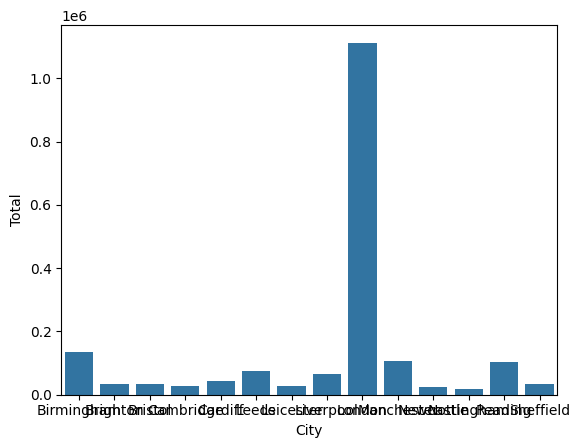

In [245]:
sns.barplot(data=pax3[pax3['Year'] == 2019], x='City', y='Total')

That's not so great, because the city names just run over each other.  One easy solution is to flip the axes of the chart.  `seaborn` is smart enough to recognise which of the axes is category-like (the cities) and which is numerical:

<Axes: xlabel='Total', ylabel='City'>

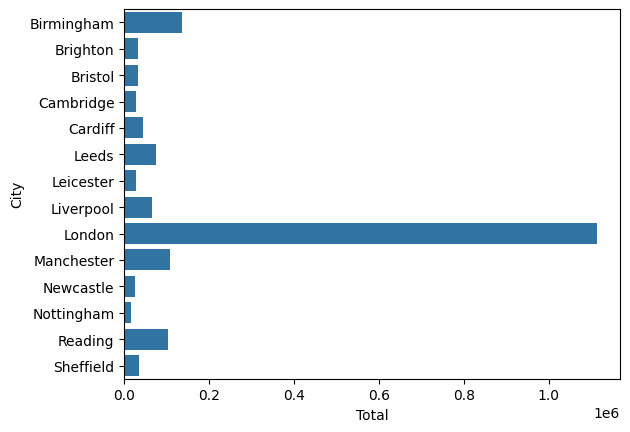

In [246]:
sns.barplot(data=pax3[pax3['Year'] == 2019], x='Total', y='City')

But, what if you wanted to keep the bars vertical?  What is often done in such a circumstance is to *rotate* the labels on the x-axis (that is, the city names) so they don't overlap each other.

The approach `seaborn` takes is that it makes plots with sensible defaults.  However, it doesn't try to do everything.  Instead, because it is built on `matplotlib`, you can use `matplotlib` to further customise your visualisations.

The reason?  Above, when we call `barplot`, we see a picture.  This is because Jupyter notebooks have smarts that give us ways to look at Python objects that make sense to us as humans - just like when we have a DataFrame, Jupyter provides some nice formatting of that.

But, when we do a `barplot`, what is actually being returned in Python?

matplotlib.axes._axes.Axes

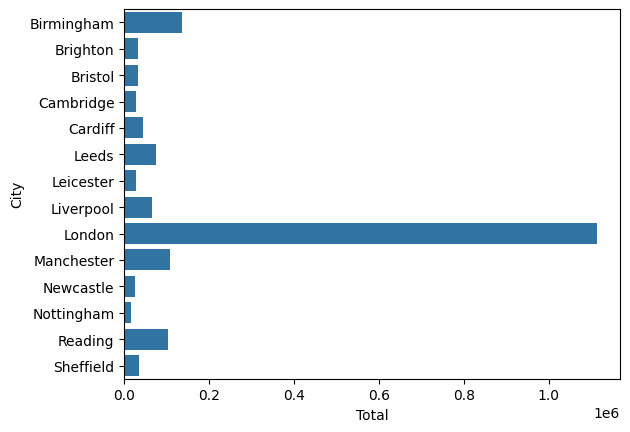

In [247]:
type(sns.barplot(data=pax3[pax3['Year'] == 2019], x='Total', y='City'))

Our figures are in fact a Python **value**, of type **Axes** from the `matplotlib` library.  So use can use the `matplotlib` package directly to further change aspects of our figure.

In [248]:
import matplotlib.pyplot as plt

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Birmingham'),
  Text(1, 0, 'Brighton'),
  Text(2, 0, 'Bristol'),
  Text(3, 0, 'Cambridge'),
  Text(4, 0, 'Cardiff'),
  Text(5, 0, 'Leeds'),
  Text(6, 0, 'Leicester'),
  Text(7, 0, 'Liverpool'),
  Text(8, 0, 'London'),
  Text(9, 0, 'Manchester'),
  Text(10, 0, 'Newcastle'),
  Text(11, 0, 'Nottingham'),
  Text(12, 0, 'Reading'),
  Text(13, 0, 'Sheffield')])

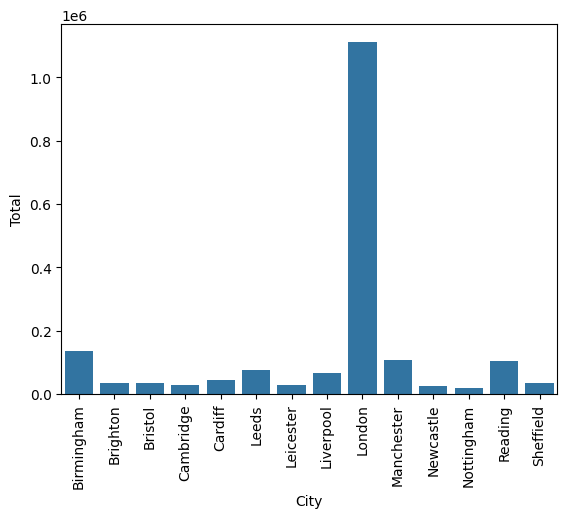

In [249]:
sns.barplot(data=pax3[pax3['Year'] == 2019], x='City', y='Total')
plt.xticks(rotation=90)

**EXERCISE**: Based on the above, write code that generates this figure, but with the cities sorted in descending order by total passenger count (so that London will be the first city on the left, for example).

In [250]:
...

Ellipsis

But let's get back on track (pun intended), and work on our main question, which is to understand the time trend.  The simplest way to deal with the limitations of our data is just to focus on the cities where we have a "complete" panel.

We know that we've got full data for the years 2017 through 2021 inclusive.  So we can start with that.  How can we figure out the total number of passengers, across all cities, for each of those years?

In [251]:
pax3[(pax3['Year'] >= 2017) & (pax3['Year'] <= 2021)].groupby('Year')['Total'].sum()

Year
2017    1.734870e+06
2018    1.804240e+06
2019    1.844723e+06
2020    4.536013e+05
2021    1.080214e+06
Name: Total, dtype: float64

`seaborn` can make a `lineplot` of this easily:

<Axes: xlabel='Year', ylabel='Total'>

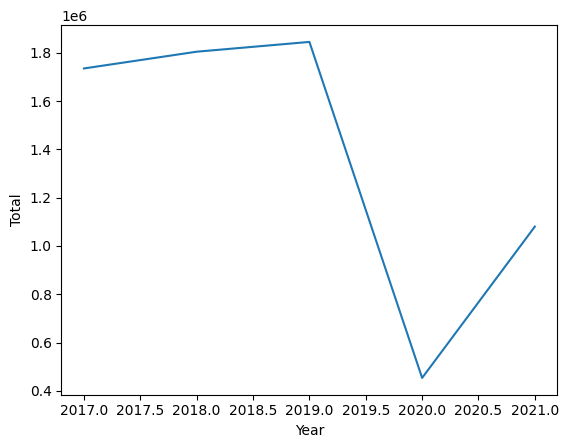

In [252]:
sns.lineplot(pax3[(pax3['Year'] >= 2017) & (pax3['Year'] <= 2021)].groupby('Year')['Total'].sum())

But our $x$-axis labels aren't great, because half-years don't really make sense here.  One way we can change that is again to use the `matplotlib` function `.xticks`; in this case, we can give it a list of the $x$-axis values we would like to have ticks for.

([<matplotlib.axis.XTick at 0x137e97ad0>,
 [Text(2017, 0, '2017'),
  Text(2018, 0, '2018'),
  Text(2019, 0, '2019'),
  Text(2020, 0, '2020'),
  Text(2021, 0, '2021')])

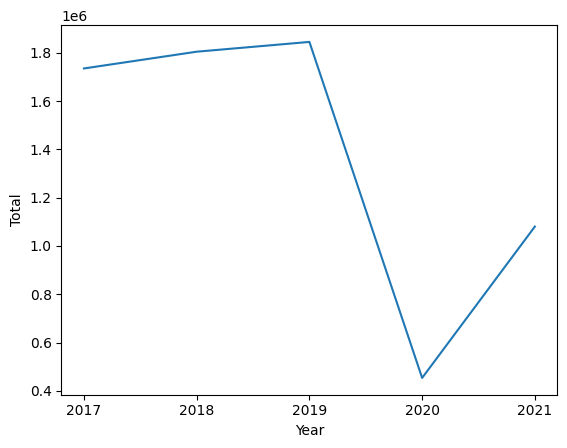

In [253]:
sns.lineplot(pax3[(pax3['Year'] >= 2017) & (pax3['Year'] <= 2021)].groupby('Year')['Total'].sum())
plt.xticks([2017, 2018, 2019, 2020, 2021])

So we see the dip is big in 2020, and that recovery was far from complete in 2021.  It would therefore be nice to include 2022.  With London missing for 2022, we need to filter out London.

**EXERCISE** Extend the above figure (a) remove London from the list of cities and (b) plot the resulting totals for the years 2017 to 2022 inclusive.

In [254]:
...

Ellipsis

We see evidence of further recovery in 2022, but still not to the level of 2017.

Given that, it would be interesting to ask - what was the more recent year when passenger counts were comparable to those seen in 2022?  Here, we will need also to filter out the cities which only start in 2017.  We could do that "by hand" as we just did for London, but that is tedious - and in general you would want to be able to automate this process!

There are a few ways to accomplish that.  We'll look at one here, which is based on using `.groupby()`.  Earlier we wrote code that gave us the first year and last year of data for each city, using `.groupby()`.  What we can do is to augment our DataFrame to include the first year and last year for each row's city.

So far we have used `.groupby()` to **aggregate** a Series.  We can also use it to **transform** a Series.  An aggregation (usually) takes a Series and reduces it to a single value.  A transformation takes a Series and converts it to another Series which has the same length as the original Series.

We can do a transformation by calling the function `.transform()` instead of `.agg()` (or another aggregation function):

In [255]:
pax3.groupby('City')['Year'].transform('min')

0      2011
2      2011
4      2011
6      2011
8      2011
       ... 
560    2011
562    2011
564    2011
566    2017
568    2011
Name: Year, Length: 149, dtype: int64

The above Series says, for each row, the first year that the city in question appears in our dataset.  This is another way of constructing a new column (variable) - which we can add to our dataset! 

In [256]:
pax3.assign(first_year=pax3.groupby('City')['Year'].transform('min'))

,Year,City,Total,Morning,Evening,first_year
0,2011,Birmingham,108545.829145,35773.362403,21803.398317,2011
2,2011,Bristol,26169.159375,7922.885628,6261.629792,2011
4,2011,Cardiff,33119.268632,10981.032803,7505.600888,2011
6,2011,Leeds,64840.826619,23262.339878,12894.431486,2011
8,2011,Leicester,24968.495970,5353.001330,5927.795935,2011
...,...,...,...,...,...,...
560,2022,Manchester,78246.062041,19958.092641,16375.898359,2011
562,2022,Newcastle,24717.793052,3262.296201,5526.206730,2011
564,2022,Nottingham,12509.625613,2813.208744,2949.466667,2011
566,2022,Reading,87161.835868,18865.930818,19936.485954,2017


So let's create a new DataFrame by transforming `pax3` and adding the first and last year in the sample for each city:

In [257]:
pax4 = pax3.assign(first_year=pax3.groupby('City')['Year'].transform('min'),
                   last_year=pax3.groupby('City')['Year'].transform('max'))
pax4

,Year,City,Total,Morning,Evening,first_year,last_year
0,2011,Birmingham,108545.829145,35773.362403,21803.398317,2011,2022
2,2011,Bristol,26169.159375,7922.885628,6261.629792,2011,2022
4,2011,Cardiff,33119.268632,10981.032803,7505.600888,2011,2022
6,2011,Leeds,64840.826619,23262.339878,12894.431486,2011,2022
8,2011,Leicester,24968.495970,5353.001330,5927.795935,2011,2022
...,...,...,...,...,...,...,...
560,2022,Manchester,78246.062041,19958.092641,16375.898359,2011,2022
562,2022,Newcastle,24717.793052,3262.296201,5526.206730,2011,2022
564,2022,Nottingham,12509.625613,2813.208744,2949.466667,2011,2022
566,2022,Reading,87161.835868,18865.930818,19936.485954,2017,2022


This is a big help, because now we can express our inclusion logic for our sample much more easily!

**EXERCISE**: Create a DataFrame `pax5` which contains only observations for cities where we have a full time series of observations from 2011 to 2022 inclusive.

In [258]:
pax5 = pax4[(pax4['Year'] <= 2012)]

Now, with `pax5`, plotting our time series is easy:

<Axes: xlabel='Year', ylabel='Total'>

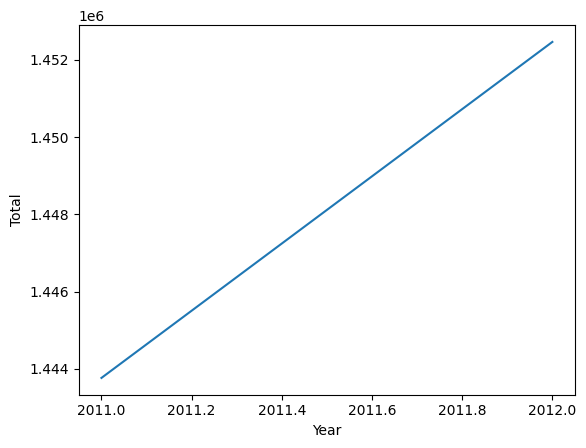

In [259]:
sns.lineplot(pax5.groupby('Year')['Total'].sum())

We see that, at least in the cities in our restricted sample, total passenger counts still are below 2011 levels.

What if we want to look city-by-city?  Last week we did a plot with multiple lines, but our data structure was different: We had each series we wanted to plot (each programming language) in a column.  Here, our data are in rows, so the equivalent call to `lineplot` won't do the job.

Of course, `seaborn` handles this!  However, the argument you need to pass to `lineplot` to accomplish the grouping we want is not intuitive.  It's called `hue`.  The reason for this name is that each group is plotted in a different hue (which for you non-native-English speakers, basically means "colour").  But, basically, you can think of it as specifying your "grouping" variable.

<Axes: xlabel='Year', ylabel='Total'>

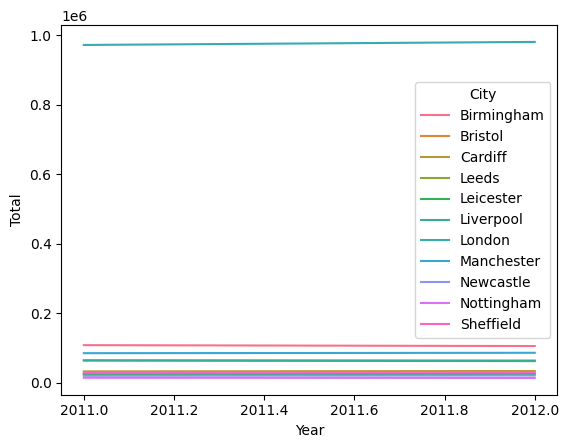

In [260]:
sns.lineplot(data=pax5, x='Year', y='Total', hue='City')

Notice here that we've made a `lineplot` that looks similar to our programming languages one, but we called `lineplot` differently.  This is because our DataFrame is organised differently - our data has a different "shape".  Our next exercise will focus on the various "shapes" your data can be in - and why there are different "shapes" in the first instance!

But for now, I want to cover one last item on aggregation.  We've only looked at the "Total" column.  We didn't do anything with the "Morning" or "Evening" columns - we made them at the start but they've gone completely unloved!

When we aggregate our totals by year, we can aggregate over multiple columns.  So for example we can do this, which produces totals for all three columns:

In [261]:
pax5.groupby('Year')[['Total', 'Morning', 'Evening']].sum()

,Total,Morning,Evening
Year,,,
2011,1.443763e+06,678442.864336,215134.684970
2012,1.452462e+06,684253.756944,217281.175753


So I'll leave you with two exercises for further practice!

**EXERCISE**: (Should be fairly easy!) Repeat the analysis of total passenger counts using instead the morning or evening counts.

In [262]:
...

Ellipsis

**EXERCISE**: (Slightly more challenging).  Create a plot of passenger counts in Birmingham showing the morning, evening, and total counts by year.

In [263]:
...

Ellipsis

# Taking stock

In this workshop we've introduced several concepts:

* We've seen how to do operations on Series using both arithmetic and logical operations, applied element-by-element.
* We've distinguished between operations which **transform** Series - resulting in a Series with the same length - and those that **aggregate** Series, resulting (usually) in a single value.
* We've introduced the concept of **grouping** data, and applying aggregations or transformations group-wise to data.
* We've seen how to make a boxplot in `seaborn`, and (in a small way) how to use `matplotlib` to customise aspects of the figures that `seaborn` produces.

Coming up we'll start looking in more detail at two ideas that emerge from today's discussions:
#. It may start to seem like there's an endless list of operations you can do on DataFrames.  Actually, they all fall into a very small number of categories!  With just a few types of operation, you can express any calculation you might want to do on your data.
#. Our experience with `lineplot` in this workshop and the previous one hint that there's more than one way data can be organised.  We will unpack this concept of data "shape" in much greater detail, as it's central to the process of "data wrangling".
